<h1>Chapter 9: Plotting and Visualization</h1>
<div class="toc">
  <ul class="toc-item">
    <li>
      <span>9.1 A Brief matplotlib API Primer</span>
      <ul class="toc-item">
        <li><span>Figures and Subplots</span></li>
        <li><span>Colors, Markers, and Line Styles</span></li>
        <li><span>Ticks, Labels, and Legends</span></li>
        <li><span>Annotations and Drawing on a Subplot</span></li>
        <li><span>Saving Plots to File</span></li>
        <li><span>matplotlib Configuration</span></li>
      </ul>
    </li>
    <li>
      <span>9.2 Plotting with pandas and seaborn</span>
      <ul class="toc-item">
        <li><span>Line Plots</span></li>
        <li><span>Bar Plots</span></li>
        <li><span>Histograms and Density Plots</span></li>
        <li><span>Scatter or Point Plots</span></li>
        <li><span>Facet Grids and Categorical Data</span></li>
      </ul>
    </li>
    <li><span>9.3 Other Python Visualization Tools</span></li>
    <li><span>9.4 Conclusion</span></li>
  </ul>
</div>

In [1]:
# If you use Colab Notebook, you can uncomment the following to mount your Google Drive to Colab
# After that, your colab notebook can read/write files and data in your Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# If you use Colab Notebook, please change the current directory to be the folder that you save
# your Notebook and data folder for example, I save my Colab files and data in the following location

#%cd /content/drive/MyDrive/Colab\ Notebooks

In [3]:
# Importing essential libraries for numerical computations and data manipulation
import numpy as np
import pandas as pd

# Storing the current maximum number of rows displayed in pandas DataFrame outputs for later restoration
PREVIOUS_MAX_ROWS = pd.options.display.max_rows

# Setting various display options for pandas DataFrames
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

# Setting a seed for NumPy's random number generator
np.random.seed(12345)

# Importing Matplotlib's pyplot for plotting graphs, aliased as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# Setting default figure size for Matplotlib plots
plt.rc("figure", figsize=(10, 6))

# Configuring NumPy to display numbers with a fixed precision
np.set_printoptions(precision=4, suppress=True)


## 9.1 A Brief matplotlib API Primer

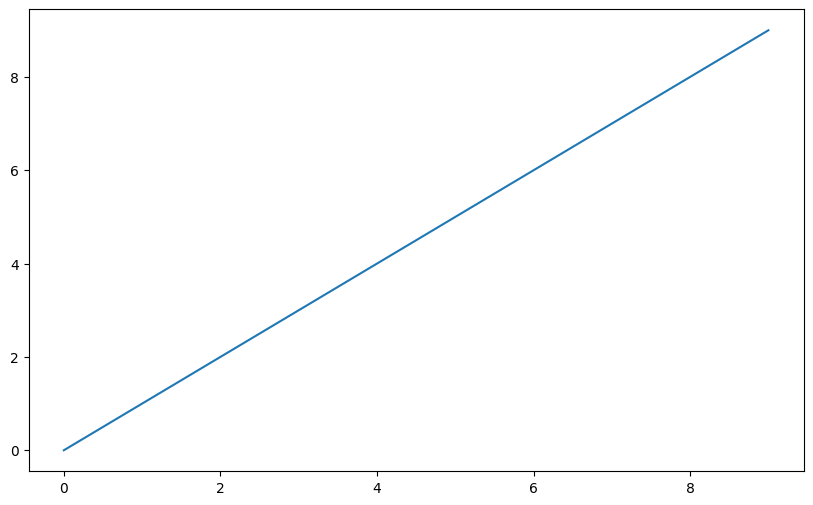

In [4]:
# Creating a 1D array containing integers from 0 to 9
data = np.arange(10)

# Displaying the created array 'data'
data

# Plotting the array 'data' using Matplotlib's pyplot interface. Since only 'y' values are provided,
# 'x' values default to the index of each element in 'data'. This results in a linear plot.
plt.plot(data)


### Figures and Subplots

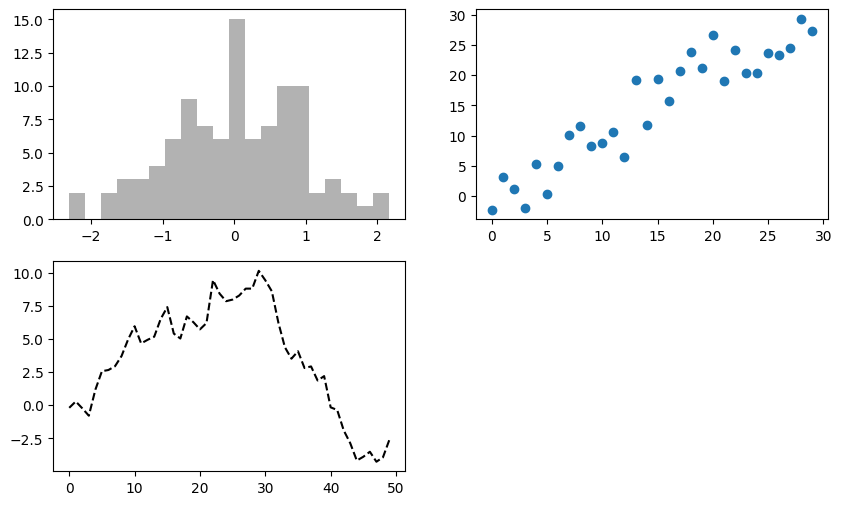

In [5]:
fig = plt.figure()  # Creates a new figure object

ax1 = fig.add_subplot(2, 2, 1)  # Adds a subplot to the first position in a 2x2 grid within the figure

ax2 = fig.add_subplot(2, 2, 2)  # Adds a subplot to the second position in a 2x2 grid within the figure
ax3 = fig.add_subplot(2, 2, 3)  # Adds a subplot to the third position in the same grid

# On 'ax3', plot the cumulative sum of 50 random samples from a standard normal distribution.
# The line style is set to dashed.
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

# On 'ax1', create a histogram of 100 random samples from a standard normal distribution.
# The histogram has 20 bins and the bars are semi-transparent (alpha=0.3) and black.
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)

# On 'ax2', create a scatter plot with 30 points. The x-values are simply a sequence of integers from 0 to 29,
# and the y-values are the same sequence offset by a random amount, scaled by 3 times the standard deviation
# of a standard normal distribution.
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))


In [6]:
plt.close("all")  # Closes all open Matplotlib figures

To make creating a grid of subplots more convenient, matplotlib includes a plt.subplots method that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

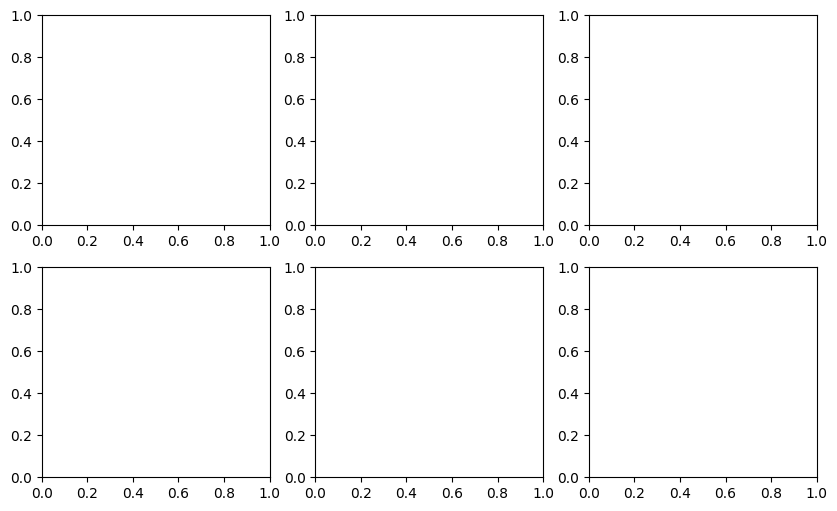

In [7]:
fig, axes = plt.subplots(2, 3)  # Creates a figure and a 2x3 grid of subplots, returning the figure and an array of Axes objects. An Axes object encapsulates all the elements of an individual (sub-)plot in a figure
#'fig' refers to the figure object,
# and 'ax' refers to the axes object representing the subplot.
axes

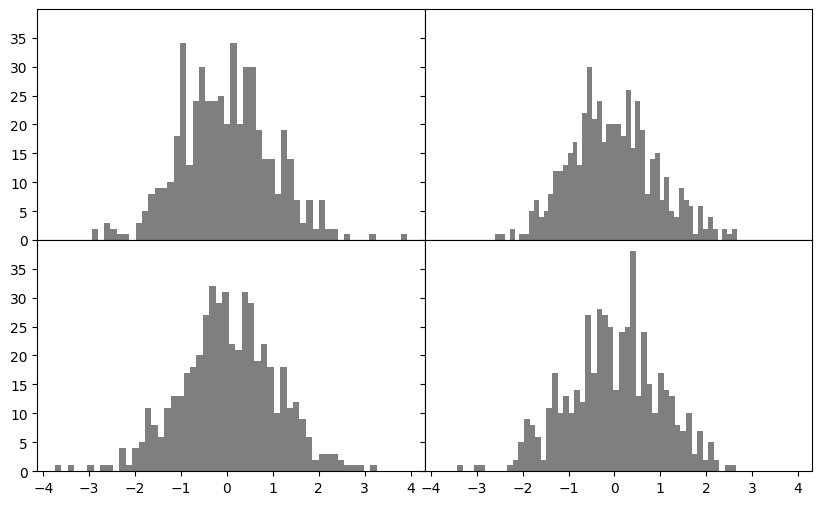

In [8]:
# Creating a 2x2 grid of subplots with shared x and y axes.
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

# Looping over each row and column in the 2x2 grid of subplots
for i in range(2):  # Iterates over the two rows
    for j in range(2):  # Iterates over the two columns within each row
        # In each subplot, plotting a histogram of 500 samples from a standard normal distribution
        # 'bins' defines how many bins the data should be divided into, 'color' sets the bar color,
        # and 'alpha' sets the transparency of the bars.
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)

# Adjusting the space between subplots to 0, effectively removing any space between them.
# 'wspace' controls the width of the space between subplots,
# 'hspace' controls the height of the space between subplots.
fig.subplots_adjust(wspace=0, hspace=0)


### Colors, Markers, and Line Styles

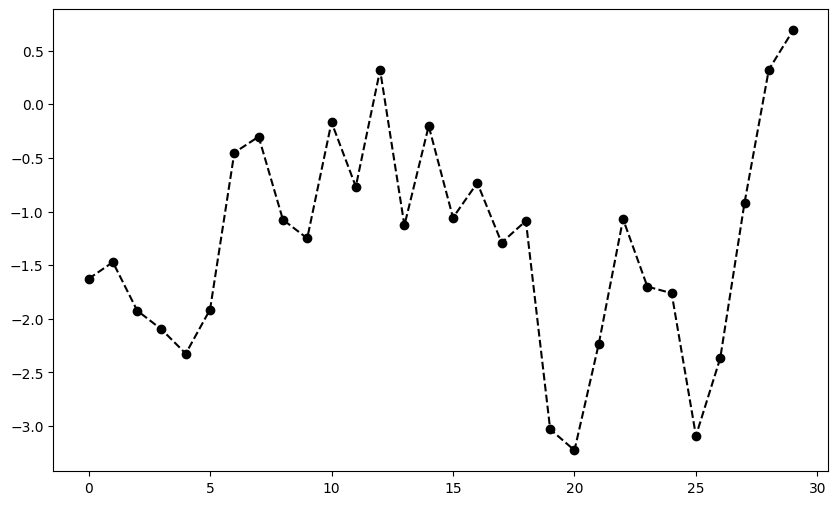

In [9]:
fig = plt.figure() # Creates a new figure object

# Adding a new subplot to the existing figure without specifying the grid dimensions.
# This creates a single subplot that covers the entire figure.
ax = fig.add_subplot()

# Generating 30 random samples from a standard normal distribution and computing their cumulative sum.
# Then, plotting this cumulative sum on the newly added subplot 'ax'.
# The plot is customized with a black color, dashed linestyle, and circle markers at each data point.
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", marker="o")

In [10]:
plt.close("all")  # Closes all open Matplotlib figures, freeing up system resources


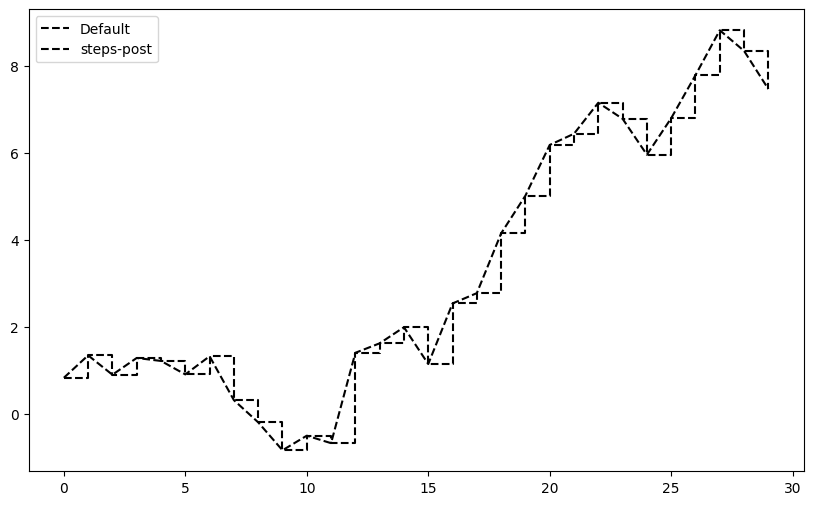

In [11]:
# Create a new figure object. This acts as a container for all plots.
fig = plt.figure()

# Add a single subplot to the figure. Since no grid size is specified, it defaults to a 1x1 grid,
# and this subplot takes up the whole figure.
ax = fig.add_subplot()

# Generate an array of 30 random samples from a standard normal distribution and compute their cumulative sum.
# This data will be used for plotting.
data = np.random.standard_normal(30).cumsum()

# Plot the cumulative sum data on the subplot 'ax'. The first plot uses a dashed line style.
# The 'label' argument assigns a label to this plot line, which will be used in the legend.
ax.plot(data, color="black", linestyle="dashed", label="Default");

# Plot the same data again on the same subplot 'ax', but this time using a 'steps-post' drawstyle,
# which changes how the line connects data points (steps after the point). A label is also assigned to this line.
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");

# Add a legend to the subplot 'ax'. The legend uses the labels assigned to each plot line
# and helps distinguish between the two different drawstyles used.
ax.legend()


### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and tick labels

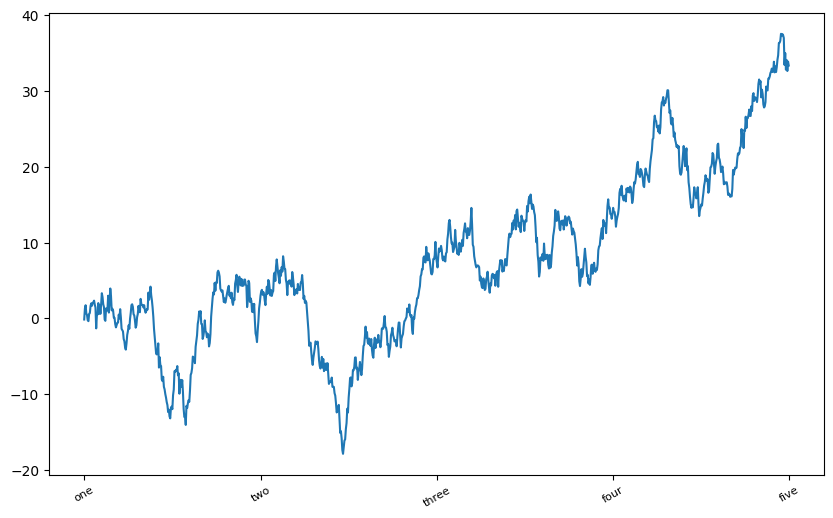

In [12]:
# Create a figure and a single subplot within that figure.

fig, ax = plt.subplots()

# Generate an array of 1000 random samples from a standard normal distribution
# and compute their cumulative sum.

ax.plot(np.random.standard_normal(1000).cumsum());

# Set specific positions for the ticks on the x-axis of the subplot 'ax'.
# The ticks are placed at positions 0, 250, 500, 750, and 1000.
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# Assign custom labels to the ticks set above. The labels are "one", "two", "three", "four", and "five".
# The 'rotation' parameter tilts the labels by 30 degrees, making them slanted for better readability and space management.
# The 'fontsize' parameter sets the font size of the labels to 8, which can help in fitting labels into smaller spaces or making them less obtrusive.
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)



#### Adding legends

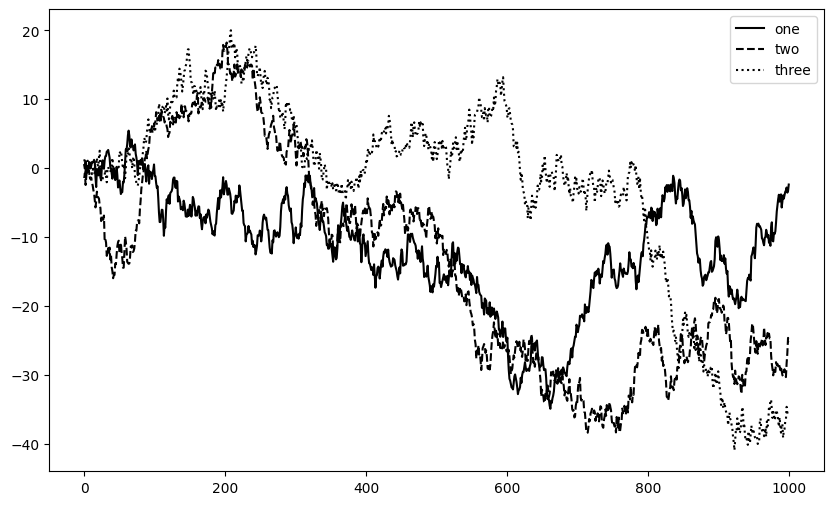

In [13]:
# Create a new figure and a single subplot within that figure.
fig, ax = plt.subplots()

# Plot the cumulative sum of 1000 random samples from a standard normal distribution on the subplot 'ax'.
# The first line is plotted with the default line style (solid) and is labeled "one".
# The 'color' argument sets the line color to black.
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");

# Plot another cumulative sum of 1000 random samples, but with a dashed line style this time.
# This line is labeled "two". The 'linestyle' argument specifies the line should be dashed.
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two");

# Plot a third cumulative sum of 1000 random samples, this time with a dotted line style.
# This line is labeled "three". The 'linestyle' argument specifies the line should be dotted.
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three");

ax.legend()

### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

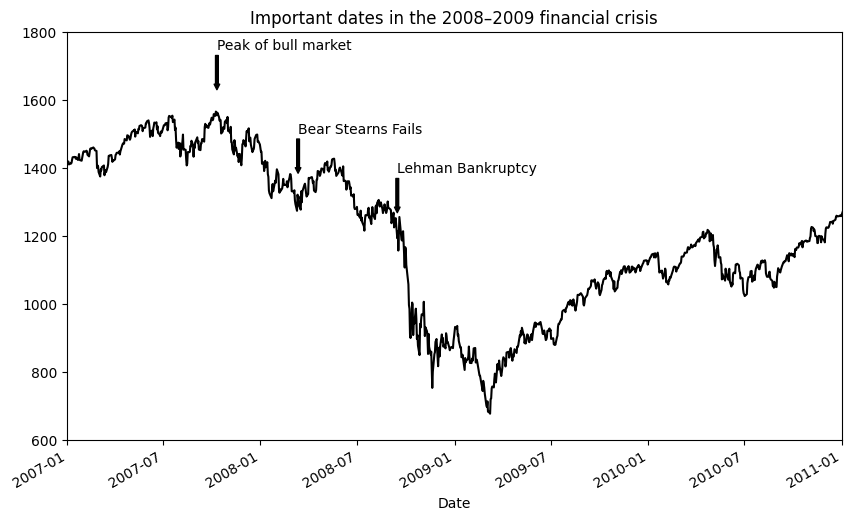

In [14]:
# Importing necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Creating a figure and a single subplot
fig, ax = plt.subplots()

# Loading the S&P 500 data from a CSV file. The first column is used as the index (date),
# and Pandas is instructed to parse these dates.
data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)

# Extracting the S&P 500 index values into a variable named 'spx'
spx = data["SPX"]

# Plotting the S&P 500 index data on the subplot 'ax' with a black line
spx.plot(ax=ax, color="black")

# Defining key dates and labels for the financial crisis annotations
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

# Looping through the crisis_data to add annotations to the plot
for date, label in crisis_data:
    ax.annotate(label,  # The text for the annotation
                xy=(date, spx.asof(date) + 75),  # The point (x, y) to annotate
                xytext=(date, spx.asof(date) + 225),  # The position (x, y) to place the text at
                arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),  # Arrow properties
                horizontalalignment="left", verticalalignment="top")  # Text alignment

# Setting the x-axis limits to focus on the period from January 1, 2007, to January 1, 2011
ax.set_xlim(["1/1/2007", "1/1/2011"])

# Setting the y-axis limits to range from 600 to 1800
ax.set_ylim([600, 1800])

# Adding a title to the subplot
ax.set_title("Important dates in the 2008–2009 financial crisis")


### Saving Plots to File

In [15]:
# fig.savefig("figpath.svg")

# fig.savefig("figpath.png", dpi=400)

### matplotlib Configuration

In [16]:
# plt.rc("figure", figsize=(10, 10))

# plt.rc("font", family="monospace", weight="bold", size=8)

### One More Thing...

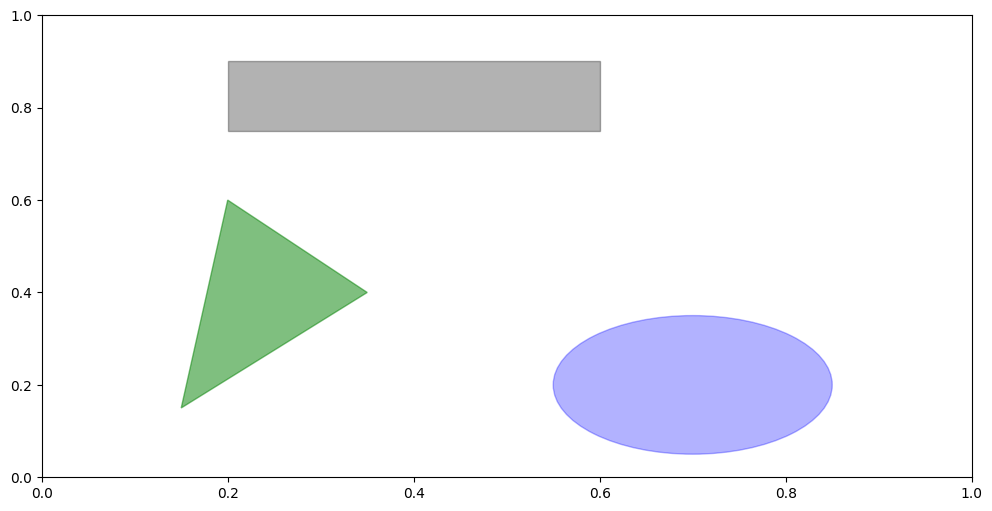

In [17]:
# Create a figure and a single subplot with specified figure size (12 inches wide by 6 inches tall)
fig, ax = plt.subplots(figsize=(12, 6))

# Create a rectangle with lower left corner at (0.2, 0.75), width of 0.4, and height of 0.15.
# The rectangle's color is set to black with a transparency alpha value of 0.3.
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)

# Create a circle with center at (0.7, 0.2) and radius of 0.15.
# The circle's color is set to blue with a transparency alpha value of 0.3.
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)

# Create a polygon using a list of [x, y] pairs for vertices: [(0.15, 0.15), (0.35, 0.4), (0.2, 0.6)].
# The polygon's color is set to green with a transparency alpha value of 0.5.
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

# Add the created rectangle to the subplot 'ax' as a patch.
ax.add_patch(rect)

# Add the created circle to the subplot 'ax' as a patch.
ax.add_patch(circ)

# Add the created polygon to the subplot 'ax' as a patch.
ax.add_patch(pgon)


In [18]:
plt.close("all") # Closes all open Matplotlib figures

## 9.2 Plotting with pandas and seaborn

### Line Plots

<Axes: >

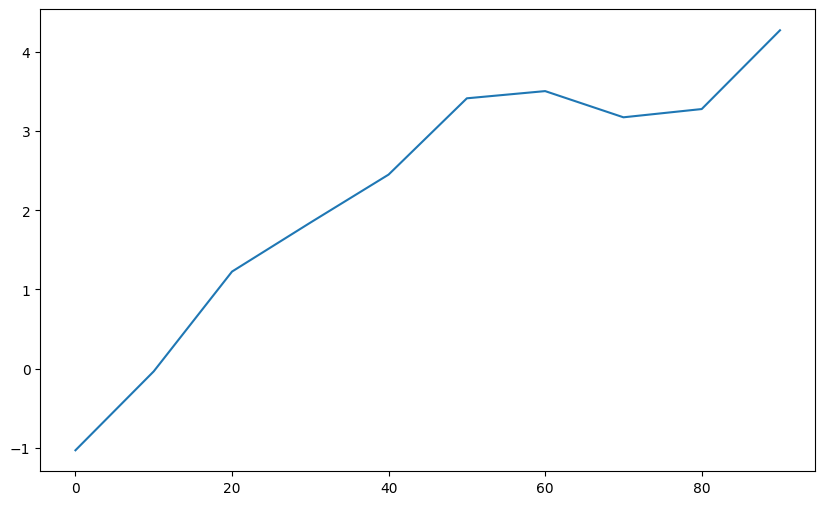

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a Pandas Series 's'. The Series data is generated by taking the cumulative sum of 10 random samples
# from a standard normal distribution (mean=0, std=1). The 'cumsum()' function calculates the cumulative sum
# of these random samples, which is a common operation for generating a random walk in data analysis.
# The Series is indexed by an array created using 'np.arange(0, 100, 10)', which generates values
# starting from 0 up to (but not including) 100, with a step of 10. This results in an index array: [0, 10, 20, ..., 90].
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

# Plot the Series 's'. Pandas plotting functionality is built on top of Matplotlib, and this command
# generates a line plot of the Series values against their index. The plot will display the cumulative sum
# of the random samples over the specified index values.
s.plot()


<Axes: >

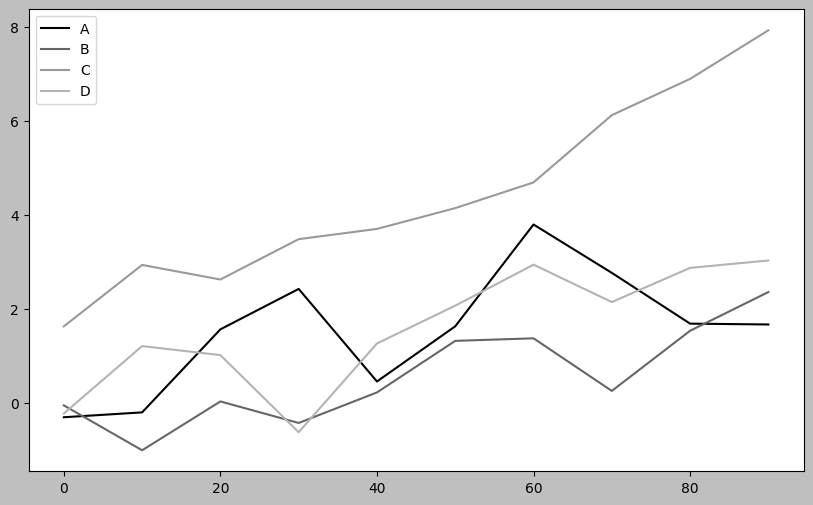

In [20]:
# Create a DataFrame 'df' with 10 rows and 4 columns, where each column represents a cumulative sum of
# random samples from a standard normal distribution. The DataFrame's index is a sequence from 0 to 90 with a step of 10.
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

# Set the Matplotlib style to 'grayscale' for all subsequent plots, giving them a monochrome appearance.
plt.style.use('grayscale')

# Plot the DataFrame 'df' using its built-in plot method. Each column in the DataFrame is plotted as a separate line.
df.plot()


### Bar Plots

<Axes: >

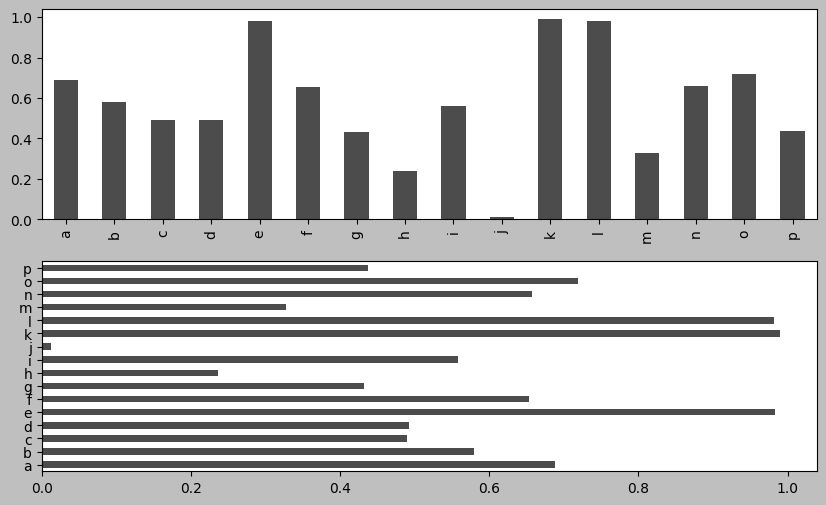

In [21]:
# Create a 2x1 grid of subplots. 'fig' references the figure object and 'axes' is an array containing the subplots.
fig, axes = plt.subplots(2, 1)

# Generate a Pandas Series 'data' with 16 random values from a uniform distribution. The index for these values
# is set to the letters 'a' through 'p'.
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

# Plot a vertical bar chart on the first subplot (axes[0]). The bars are colored black with 70% opacity (alpha=0.7).
data.plot.bar(ax=axes[0], color="black", alpha=0.7)

# Plot a horizontal bar chart on the second subplot (axes[1]) using the same data. The bars are also colored black
# with 70% opacity (alpha=0.7).
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [22]:
# Setting the seed for NumPy's random number generator to ensure reproducibility of the random numbers
np.random.seed(12348)

# Creating a DataFrame 'df' with 6 rows and 4 columns. The values are generated from a uniform distribution.
# Rows are labeled "one" through "six," and columns are labeled "A" through "D" with a column index name 'Genus'.
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

# Display the DataFrame 'df'. This line is useful in interactive environments like Jupyter Notebooks
# to show the DataFrame as an output of the cell.
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

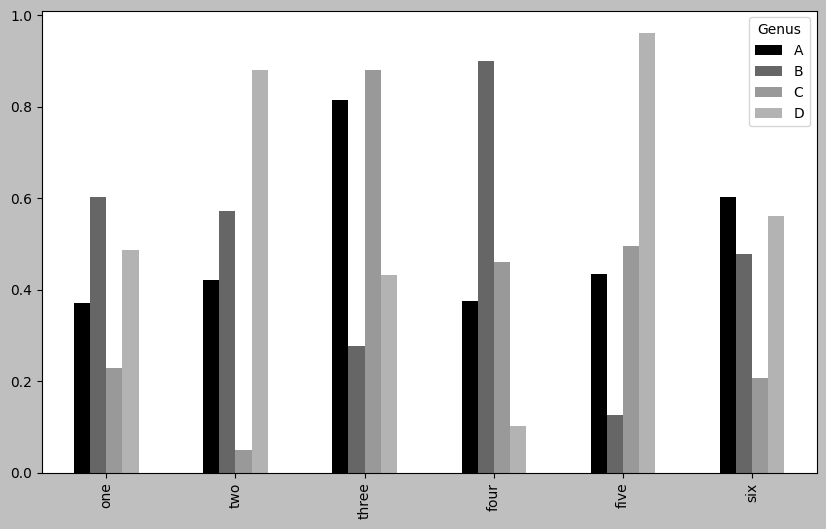

<Figure size 1000x600 with 0 Axes>

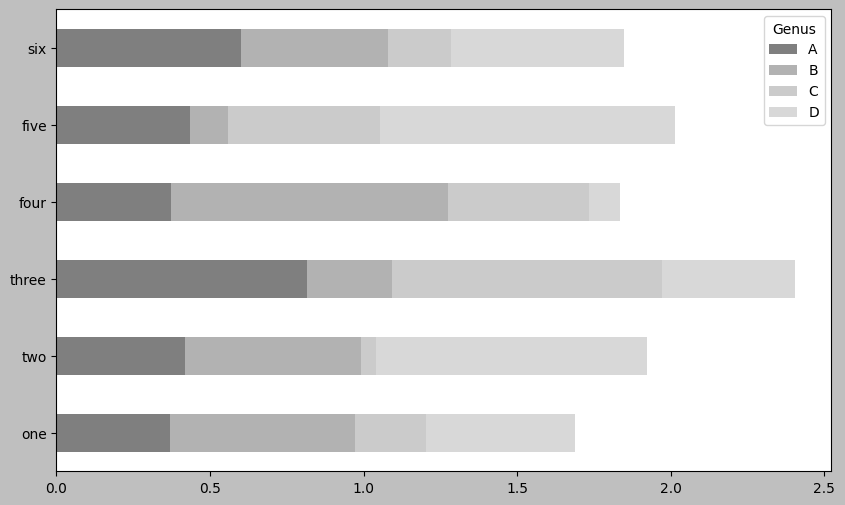

In [23]:
# Generate a vertical bar chart from the DataFrame. Each bar group corresponds to a row in the DataFrame,
# with one bar per column. The legend labels are taken from the column index name 'Genus'.
df.plot.bar()

# Create a new figure. This is necessary because without creating a new figure, the next plot would be drawn
# on the same figure as the previous plot, which might not be the intended behavior.
plt.figure()

# Generate a horizontal stacked bar chart from the DataFrame. In this chart, each row's bars are stacked,
# and each row corresponds to an index label. The 'alpha' parameter sets the transparency of the bars.
df.plot.barh(stacked=True, alpha=0.5)


In [24]:
plt.close("all") # Closes all open Matplotlib figures

In [25]:
# Import necessary libraries
import pandas as pd

# Read the 'tips.csv' file into a DataFrame named 'tips'. This CSV file presumably contains data related to restaurant tips.
tips = pd.read_csv("tips.csv")

# Display the first five rows of the DataFrame to understand its structure and contents.
tips.head()

# Create a cross-tabulation of the number of occurrences of each party size ('size') for each day of the week ('day').
# This results in a DataFrame where the index represents days and the columns represent party sizes.
party_counts = pd.crosstab(tips["day"], tips["size"])

# Reindex the 'party_counts' DataFrame to ensure the days are in a specific order: Thursday, Friday, Saturday, Sunday.
# This is useful for analysis and visualization purposes, ensuring the data follows a logical sequence.
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

# Display the reindexed 'party_counts' DataFrame. This shows the frequency of each party size for each day,
# with days ordered as specified.
party_counts


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [26]:
# Select only the columns for party sizes 2 to 5 from the 'party_counts' DataFrame.
party_counts = party_counts.loc[:, 2:5]

# Normalize the counts so that each row (each day) sums to 1. This converts counts to proportions,
# making it easier to compare days regardless of the total number of parties.
# 'div' performs element-wise division, 'axis="columns"' sums across columns for normalization factor,
# and 'axis="index"' applies the division across each row.
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

# Display the normalized DataFrame. Each cell now represents the proportion of parties of a certain size
# relative to the total number of parties that day.
party_pcts



size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

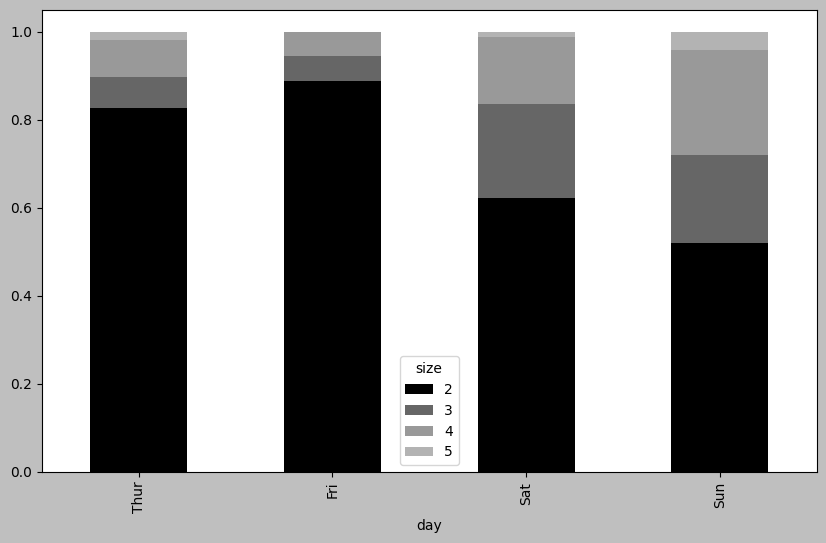

In [27]:
# Create a stacked bar chart from the 'party_pcts' DataFrame. Each bar represents a day with segments
# showing the proportion of each party size. The 'stacked=True' parameter is used to stack the segments.
party_pcts.plot.bar(stacked=True)

In [28]:
plt.close("all") # Closes all open Matplotlib figures

In [29]:
import seaborn as sns
# Calculate the tip percentage for each record in the DataFrame. The tip percentage is defined as the tip amount
# divided by the total bill amount minus the tip itself. This calculation is added as a new column 'tip_pct' in the DataFrame.
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

# Display the first few rows of the DataFrame to verify the new 'tip_pct' column and its calculated values.
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


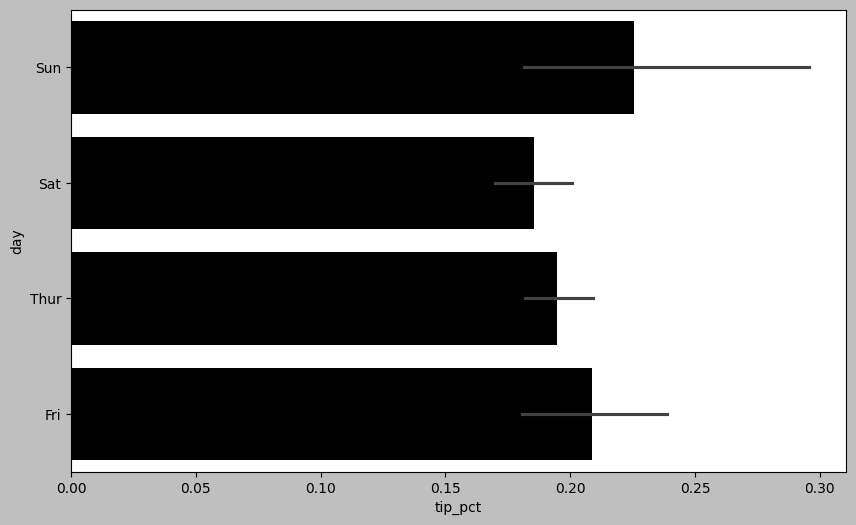

In [30]:
# Create a horizontal bar plot using Seaborn's 'barplot' function. The plot shows the average tip percentage ('tip_pct')
# for each day of the week ('day'). The 'orient="h"' parameter specifies that the bars should be horizontal.
# The 'x' parameter is set to 'tip_pct' to define the variable for which the mean is calculated and plotted,
# and the 'y' parameter is set to 'day' to define the categorical variable that groups the data.
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

# Display the plot. In environments like Jupyter Notebooks, this might not be necessary as plots are shown automatically.
plt.show()

In [31]:
plt.close("all") # Closes all open Matplotlib figures

<Axes: xlabel='tip_pct', ylabel='day'>

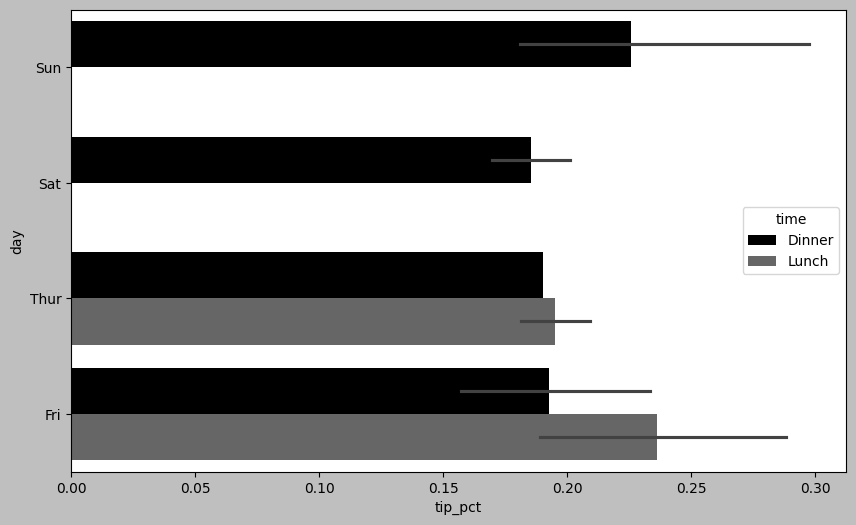

In [32]:
# Create a horizontal bar plot with Seaborn. The average tip percentage ('tip_pct') is plotted against each day of the week ('day'),
# with separate bars (colors) for different times of the day ('time', e.g., Lunch or Dinner).
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [33]:
plt.close("all") # Closes all open Matplotlib figures

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

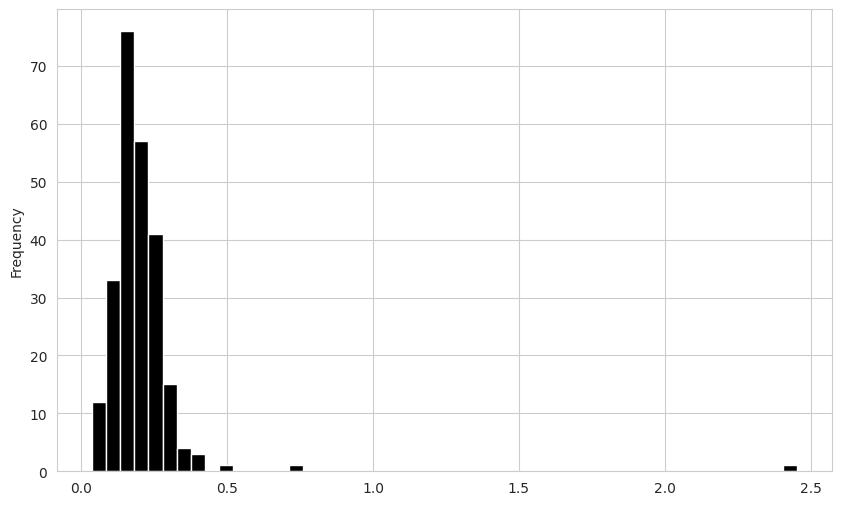

In [34]:
# Set the aesthetic style of the plots to 'whitegrid' which adds a white background with grid lines
sns.set_style("whitegrid")

# Create a new figure for plotting
plt.figure()

# Plot a histogram of the 'tip_pct' column from the 'tips' DataFrame with 50 bins, showing the distribution of tip percentages
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

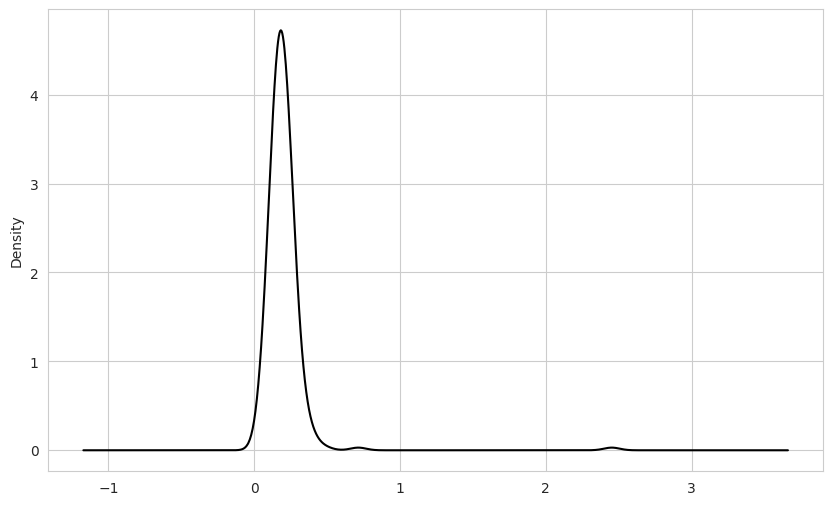

In [35]:
# Create a new figure for plotting
plt.figure()

# Plot a density plot (also known as a Kernel Density Estimate - KDE) for the 'tip_pct' column from the 'tips' DataFrame,
# showing the distribution's smooth estimate
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

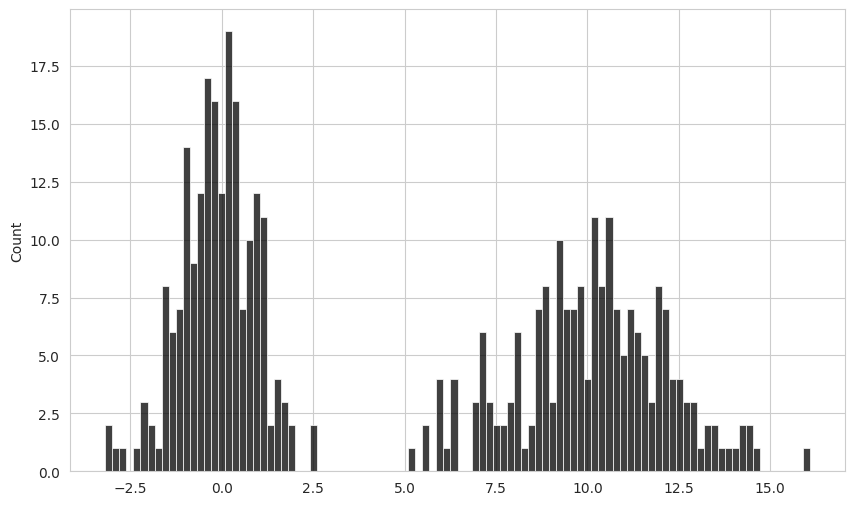

In [36]:
# Create a new figure for plotting
plt.figure()

# Generate two sets of random numbers: 'comp1' from a standard normal distribution and 'comp2' from a normal distribution shifted by 10 and scaled by 2
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)

# Combine 'comp1' and 'comp2' into a single series
values = pd.Series(np.concatenate([comp1, comp2]))

# Plot a histogram of 'values' using Seaborn's 'histplot' with 100 bins and set the color to black
sns.histplot(values, bins=100, color="black")


### Scatter or Point Plots

In [37]:
# Load macroeconomic data into a DataFrame
macro = pd.read_csv("macrodata.csv")

# Select specific columns of interest
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

# Apply a log transformation followed by a difference to the data to obtain the growth rates,
# and remove any missing values that result from differencing
trans_data = np.log(data).diff().dropna()

# Display the last few rows of the transformed data to verify the transformation and differencing
trans_data.tail()


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

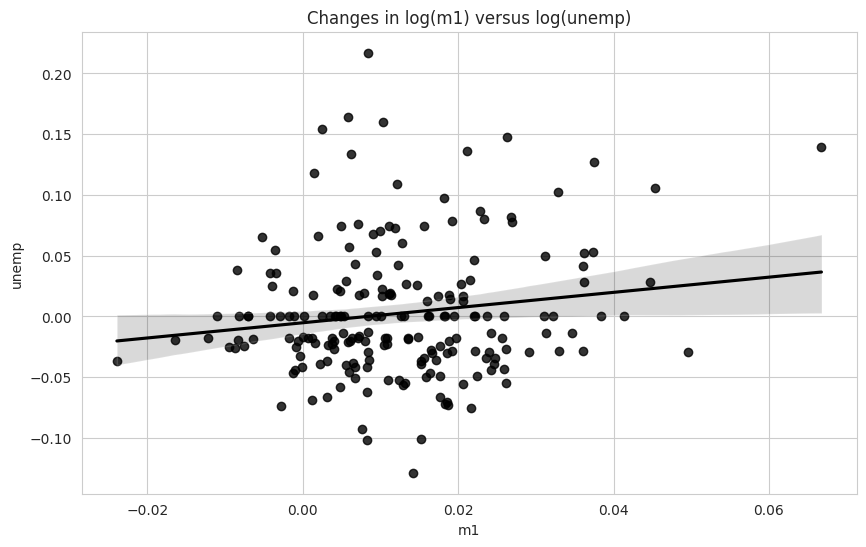

In [38]:
# Create a new figure for plotting
plt.figure()

# Plot a regression line between 'm1' and 'unemp' in the transformed data using Seaborn's regplot
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
# Set the title of the plot to describe the relationship being visualized
ax.set_title("Changes in log(m1) versus log(unemp)")


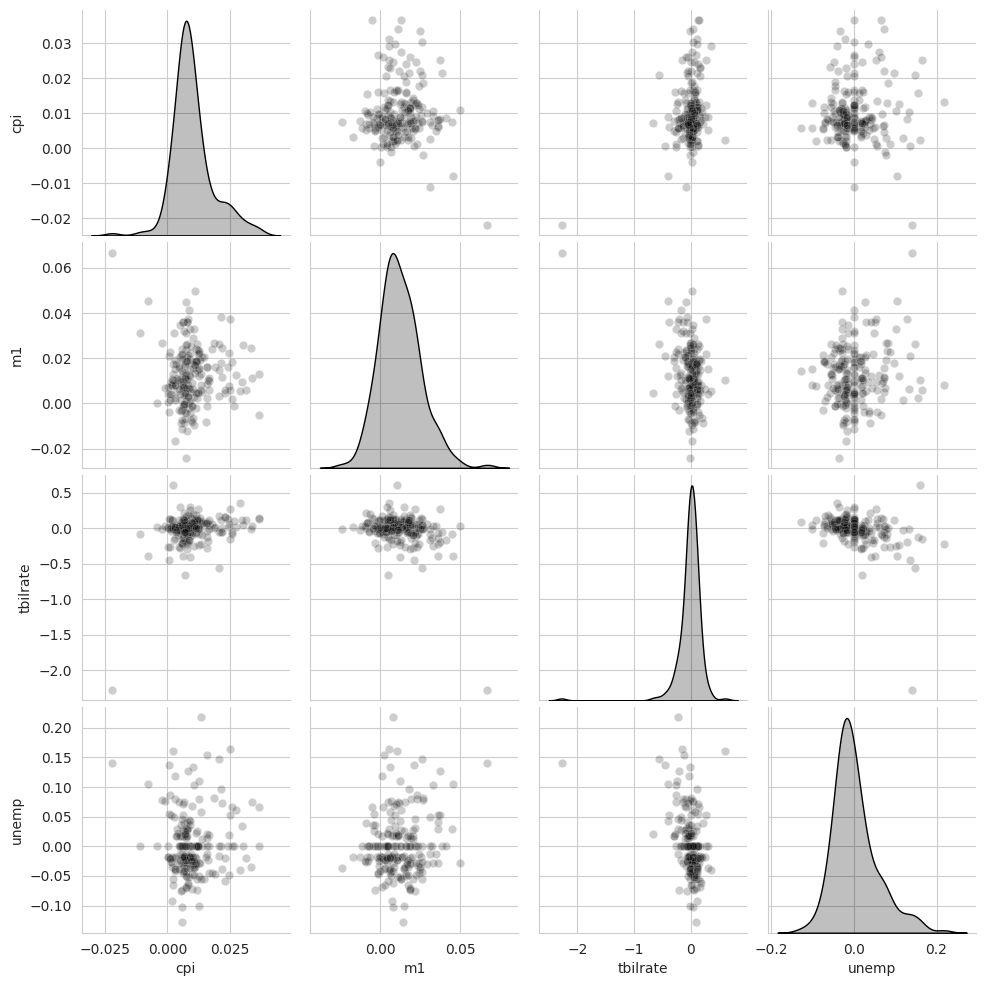

In [39]:
# Create pairplot for all variables in 'trans_data' to visualize pairwise relationships and distributions.
# Use Kernel Density Estimate (KDE) for diagonal plots and set the transparency of scatter plots with 'alpha=0.2'
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

### Facet Grids and Categorical Data

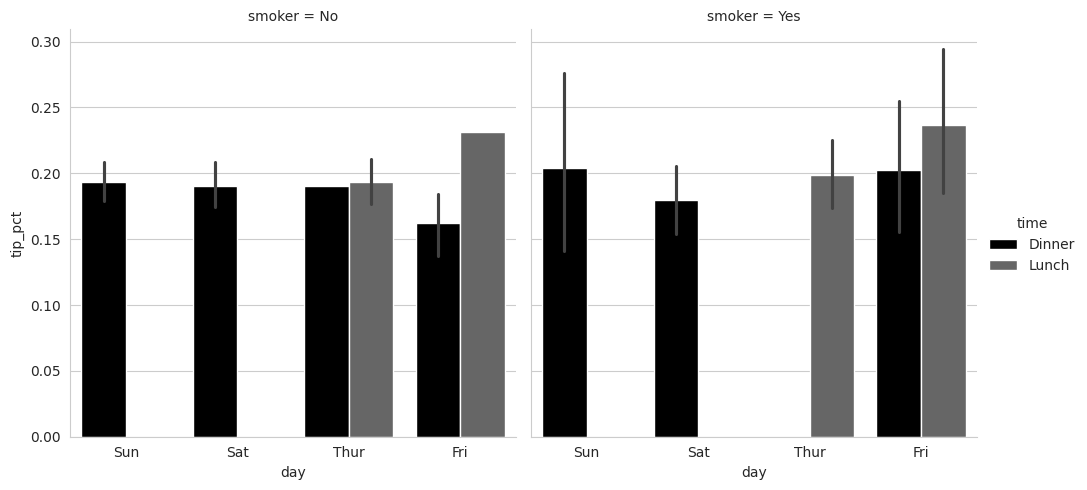

In [40]:
# Create a categorical plot (catplot) with Seaborn, displaying a bar plot of tip percentages ('tip_pct') by day,
# separated by time of day ('hue') and smoker status ('col'). Filter the data to include only tip percentages less than 1.
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

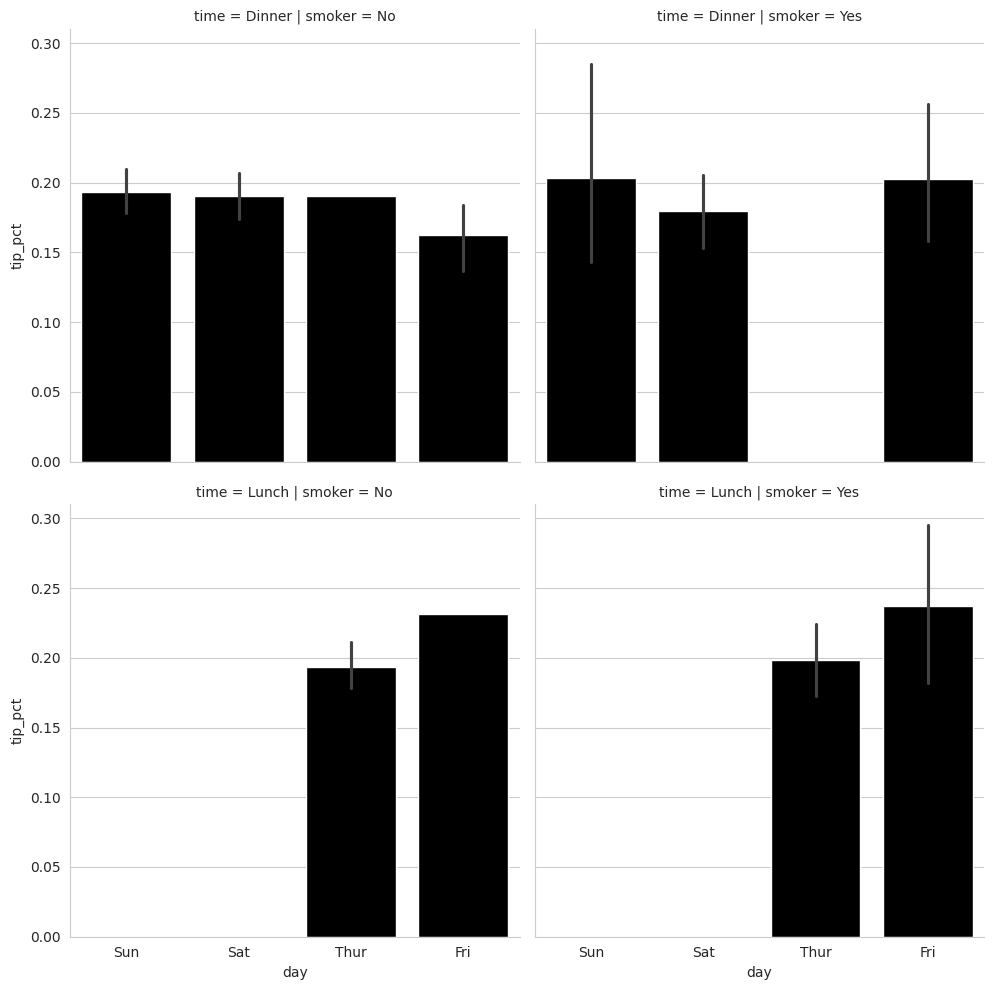

In [41]:
# Create a categorical plot (catplot) with Seaborn, displaying a bar plot of tip percentages ('tip_pct') by day,
# separated into rows by time of day ('row') and columns by smoker status ('col'). Filter the data to include only
# tip percentages less than 1.
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker", kind="bar", data=tips[tips.tip_pct < 1])


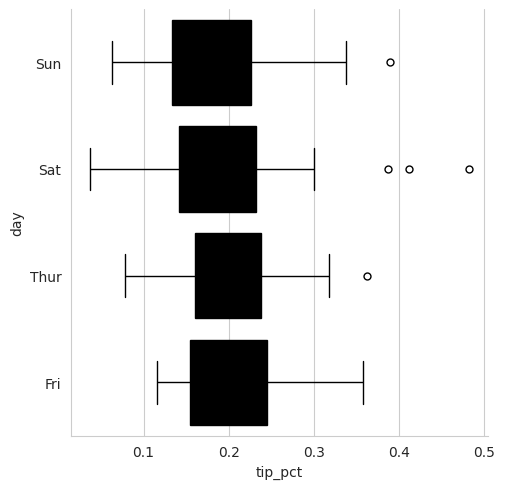

In [42]:
# Create a categorical plot (catplot) with Seaborn, displaying a box plot of tip percentages ('tip_pct') for each day,
# oriented horizontally. Filter the data to include only tip percentages less than 0.5.
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])


## 9.3 Other Python Visualization Tools

(....From Textbook...)

*As is common with open source, there many options for creating graphics in Python (too many to list). Since 2010, much development effort has been focused on creating interactive graphics for publication on the web. With tools like Altair, Bokeh, and Plotly, it's now possible to specify dynamic, interactive graphics in Python that are intended for use with web browsers.*

*For creating static graphics for print or web, I recommend using matplotlib and libraries that build on matplotlib, like pandas and seaborn, for your needs. For other data visualization requirements, it may be useful to learn how to use one of the other available tools. I encourage you to explore the ecosystem as it continues to evolve and innovate into the future.*

( .... )

## 9.4 Conclusion

The goal of this chapter was to get your feet wet with some basic data visualization using pandas, matplotlib, and seaborn. If visually communicating the results of data analysis is important in your work, I encourage you to seek out resources to learn more about effective data visualization. It is an active field of research, and you can practice with many excellent learning resources available online and in print.

